# Lending Club Case Study
A loan lending company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.Using consumer attributes and loan attributes , parameters which might be responsible for loan default are found out. This is done based on previously available data in .csv format.

In [14]:
# importing all the relavent libraries which will be required for further analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.simplefilter("ignore")
# reading the .csv file
df=pd.read_csv(filepath_or_buffer=r'D:\ML&AI\loan.csv')

## Data Cleaning and Manipulation
Those columns are removed(dropped) which might not be useful for the analysis. This might be because they don't predict default , rather happen after default, e.g. collection recovery fees. Those columns are also removed which have not applicable (na) values. Duplicate rows are dropped as well. 
For data manipulation, int_rate column which is object type due to the presence of '%' , % is removed and it is made into float type for easier analysis.
The primary driver variable in this problem is loan_status: which can be 'Charged_Off', 'Current' and 'Fully Paid'. Since loan with current status can be either charged off or fully paid, those rows with current status are dropped.
To enumerate loan_status, it is one hot encoded with loan charged off encoded to 1 and loan paid encoded as 0.

In [3]:
#data cleaning
df=df.drop(['id','member_id','funded_amnt','issue_d','delinq_2yrs','open_acc','earliest_cr_line','total_acc','funded_amnt_inv','installment','emp_title','pymnt_plan','url','acc_now_delinq','delinq_amnt','desc','title','zip_code','addr_state','mths_since_last_delinq','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','revol_bal','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type','tax_liens'],axis=1)
df=df.dropna(axis=1)
df=df.drop_duplicates()

In [4]:
# data manipulation
df['int_rate']=df['int_rate'].apply(lambda x:float(x[0:len(x)-1]))
df=df[~(df['loan_status']=='Current')]
df['loan status']=df['loan_status'].apply(lambda x:1 if x=='Charged Off' else 0)

In [5]:
# checking the information on all the rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  float64
 3   grade                38577 non-null  object 
 4   sub_grade            38577 non-null  object 
 5   home_ownership       38577 non-null  object 
 6   annual_inc           38577 non-null  float64
 7   verification_status  38577 non-null  object 
 8   loan_status          38577 non-null  object 
 9   purpose              38577 non-null  object 
 10  dti                  38577 non-null  float64
 11  pub_rec              38577 non-null  int64  
 12  loan status          38577 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 4.1+ MB


Thus we now have 13 columns which can be analyzed. Amongst these columns, loan_amnt, term, int_rate, grade,sub_grade,purpose(along with loan_status and loan status) are loan attributes and home_ownership,annual_inc, verification status, dti and public_rec are consumer attributes. First univariate analysis is done followed by bivariate analysis.

## Univariate Analysis

<Axes: >

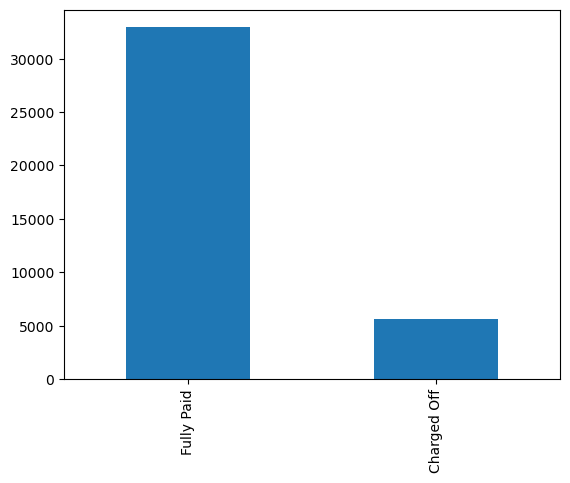

In [6]:
# analysing the primary driver variable i.e. loan_status
df['loan_status'].value_counts().plot.bar()

From the above barplot,it can be seen that there are approximately 5000 charged off loans and 30000+ Fully Paid loans, which is desirable for the LC (Lending Club) business.

<Axes: xlabel='loan_amnt', ylabel='Density'>

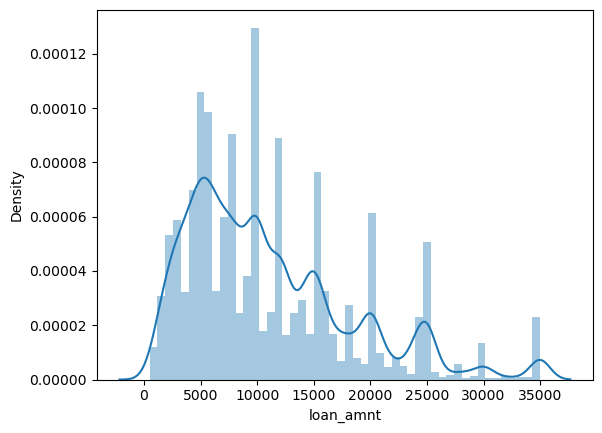

In [8]:
#univariate analysis of the Loan Amount
sns.distplot(df['loan_amnt'])

The above distribution plot for loan amount is right skewed , which means that most of the loans are low value and some are very high valued loans. There are some peaks in the graph, which might be due to rounding off to the nearest 5000th number for loan purposes.

([<matplotlib.patches.Wedge at 0x16992399510>,
 [Text(-0.788089208668613, 0.7674082350223247, '36 months'),
  Text(0.7880892445935838, -0.767408198129206, '60 months')])

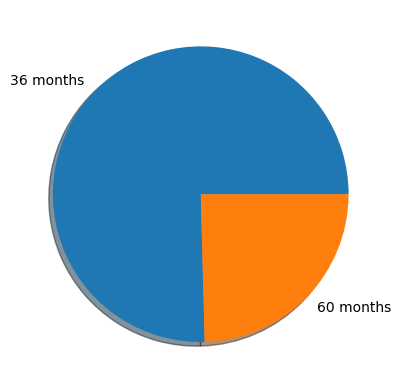

In [15]:
# univariate analysis of the term of the loan
plt.pie(df['term'].value_counts(),labels=['36 months','60 months'],shadow=True)

It can be seen from the above pie plot that the number of 36 months duration loans are far greater than number of 60 months duration loans (almost three times greater). This means that the LC gets more business volume from the 36 months loans

<Axes: xlabel='int_rate', ylabel='Density'>

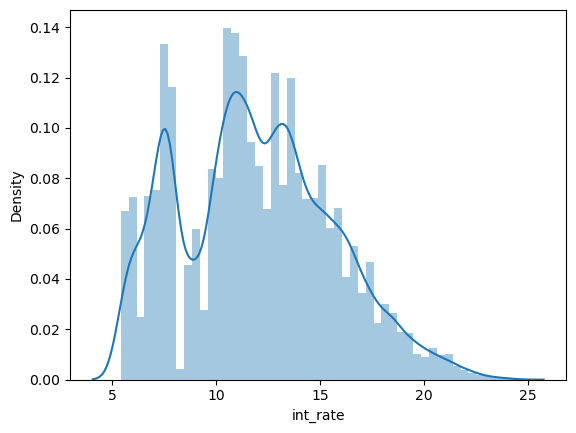

In [16]:
# univariate analysis of interest rates of the loans
sns.distplot(df['int_rate'])

It can be seen from the distribution plot for interest rates that there are two types of interest rates offered: above and below 9%. The bulk of the interest rates are offered above 9%.

<Axes: >

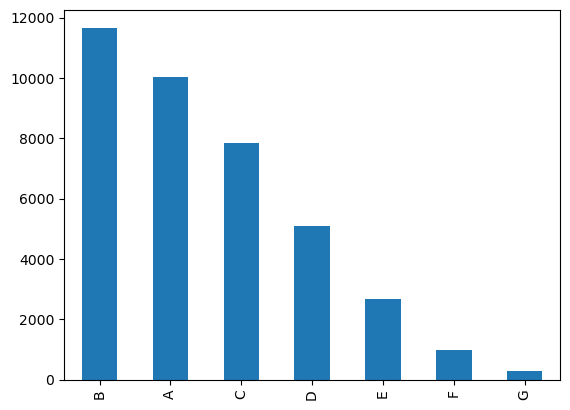

In [17]:
# univariate analysis of grades of the loans
df['grade'].value_counts().plot.bar()

It can be seen from the above bar plot that most of the loans offered are 'safe' in the sense that they are highly graded loans. Very risky loans - F and G are offered less than 1000.

<Axes: >

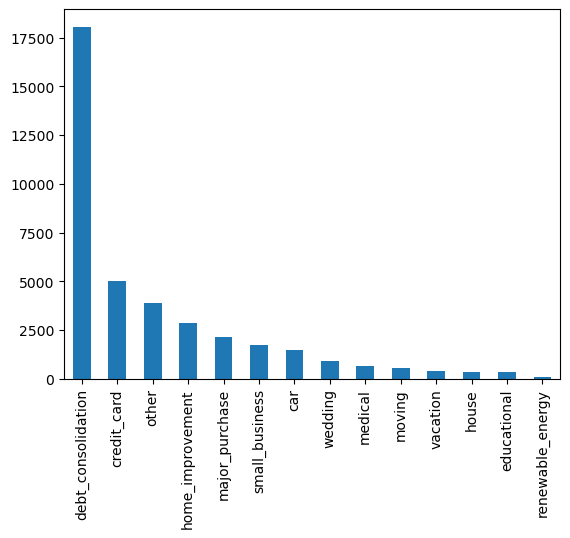

In [22]:
# univariate analysis for Purpose of loan
df['purpose'].value_counts().plot.bar()

It can be seen from the above bar chart that most of the loans are taken for debt consolidation.

<Axes: >

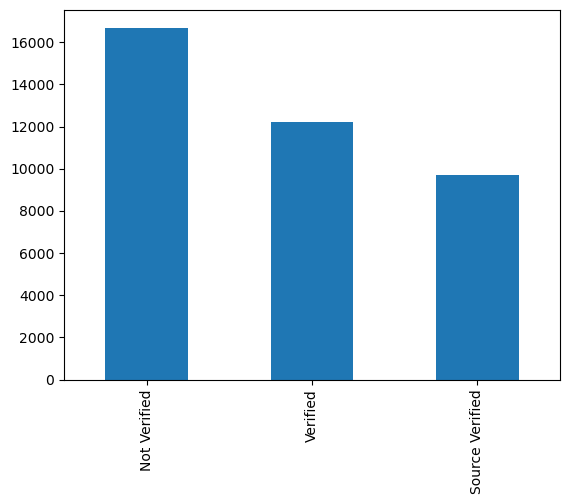

In [30]:
# univariate analysis for the verification status of the loan applicant
df['verification_status'].value_counts().plot.bar()

It can be seen that most of the loans are verified in some form or the other( source or not).

<Axes: xlabel='dti', ylabel='Density'>

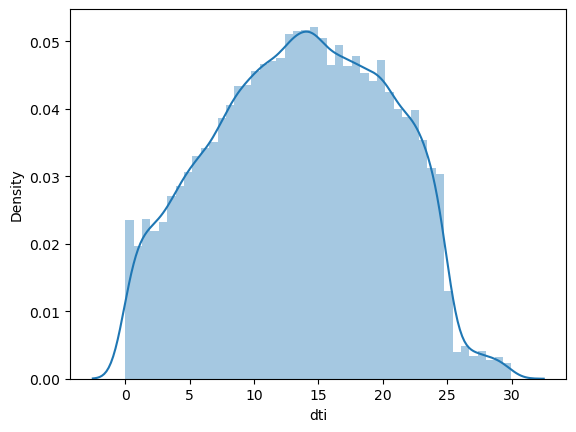

In [34]:
# DTI iscalculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
df1=df[df['annual_inc']<100000]
sns.distplot(df1['dti'])

It can be seen that most of the loan applicants have a monthly Debt to Income ratio at around 15.

# Bi-Variate Analysis
This will be done by analysing the effect of various parameters against loan_status and loan status.
First BiVariate analysis is completed with categorical variables and then they are performed with numerical variables, after studying the correlation matrix between loan status and the numerical variables.

<Axes: xlabel='term', ylabel='loan status'>

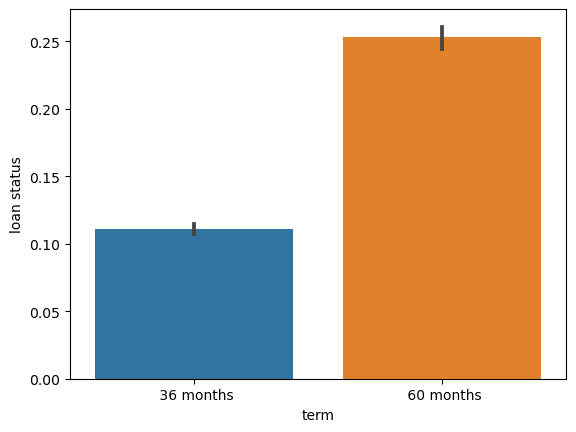

In [40]:
#analysing the impact of term of loan on loan status
sns.barplot(x=df['term'],y=df['loan status'])

It can be seen from the above barplot that the loans with a higher term are more likely to default. To check if the term is contributing signficantly to the business value, the interest earned from each term is calculated.

In [41]:
#calculating interest (simple interest =P*r*T/100)
df['term1']=df['term'].apply(lambda x:float(x[0:3]))
df['term1']=df['term1']/12
df['interest_earned']=df['loan_amnt']*df['int_rate']*df['term1']*0.01
#calculating the average interest earned from each term
x=df.groupby(by=df['term']).mean()
x['interest_earned']

term
 36 months     3254.069585
 60 months    11835.649122
Name: interest_earned, dtype: float64

It can be seen that the 60 month loan earn higher interest values of average , even though these loans also lead to a higher default as well.

<Axes: xlabel='grade', ylabel='loan status'>

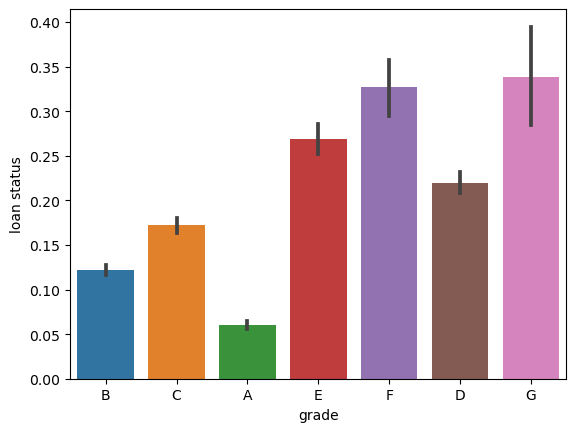

In [42]:
#analysing impact of loan grade on loan status
sns.barplot(x=df['grade'],y=df['loan status'])

It can be seen that loan grades E,F and G have higher chances of default as compared to other grade loans.

[Text(0, 0, 'B2'),
 Text(1, 0, 'C4'),
 Text(2, 0, 'C5'),
 Text(3, 0, 'C1'),
 Text(4, 0, 'A4'),
 Text(5, 0, 'E1'),
 Text(6, 0, 'F2'),
 Text(7, 0, 'B5'),
 Text(8, 0, 'C3'),
 Text(9, 0, 'B1'),
 Text(10, 0, 'D1'),
 Text(11, 0, 'A1'),
 Text(12, 0, 'B3'),
 Text(13, 0, 'B4'),
 Text(14, 0, 'C2'),
 Text(15, 0, 'D2'),
 Text(16, 0, 'A3'),
 Text(17, 0, 'A5'),
 Text(18, 0, 'D5'),
 Text(19, 0, 'A2'),
 Text(20, 0, 'E4'),
 Text(21, 0, 'D3'),
 Text(22, 0, 'D4'),
 Text(23, 0, 'F3'),
 Text(24, 0, 'E3'),
 Text(25, 0, 'F1'),
 Text(26, 0, 'E5'),
 Text(27, 0, 'G4'),
 Text(28, 0, 'E2'),
 Text(29, 0, 'G2'),
 Text(30, 0, 'G1'),
 Text(31, 0, 'F5'),
 Text(32, 0, 'F4'),
 Text(33, 0, 'G5'),
 Text(34, 0, 'G3')]

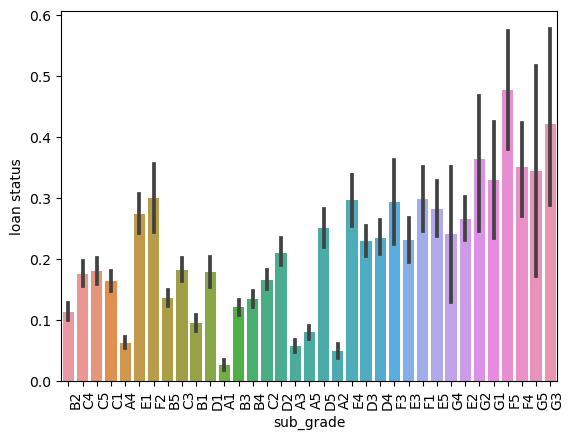

In [45]:
# analysing impact of loan subgrade on loan status
ax=sns.barplot(x=df['sub_grade'],y=df['loan status'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")

<Axes: xlabel='home_ownership', ylabel='loan status'>

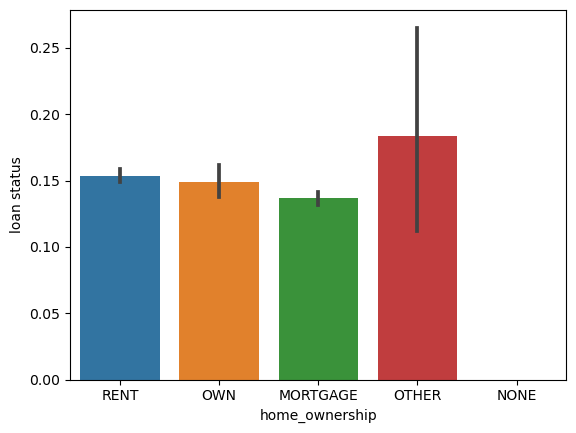

In [46]:
#analysing impact of home ownership on loan status
sns.barplot(x=df['home_ownership'],y=df['loan status'])

It can be observed that the difference between default rates for renting , owning or mortgaging a home are not much.

<Axes: xlabel='verification_status', ylabel='loan status'>

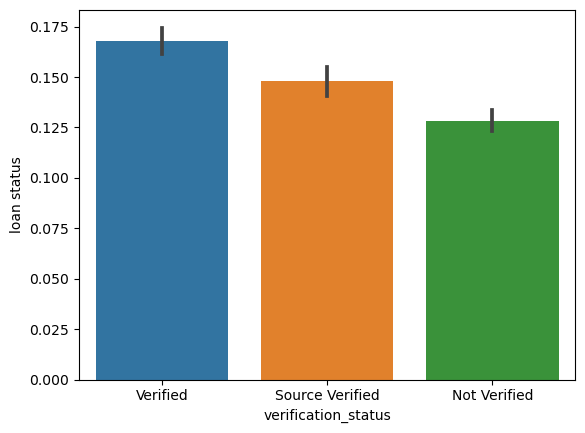

In [47]:
#analysing impact of loan verification status on loan status
sns.barplot(x=df['verification_status'],y=df['loan status'])

It can be seen from the above bar plot that loans which are verified or source verified have higher chances of defaulting as compared to not verified loans.

[Text(0, 0, 'credit_card'),
 Text(1, 0, 'car'),
 Text(2, 0, 'small_business'),
 Text(3, 0, 'other'),
 Text(4, 0, 'wedding'),
 Text(5, 0, 'debt_consolidation'),
 Text(6, 0, 'home_improvement'),
 Text(7, 0, 'major_purchase'),
 Text(8, 0, 'medical'),
 Text(9, 0, 'moving'),
 Text(10, 0, 'vacation'),
 Text(11, 0, 'house'),
 Text(12, 0, 'renewable_energy'),
 Text(13, 0, 'educational')]

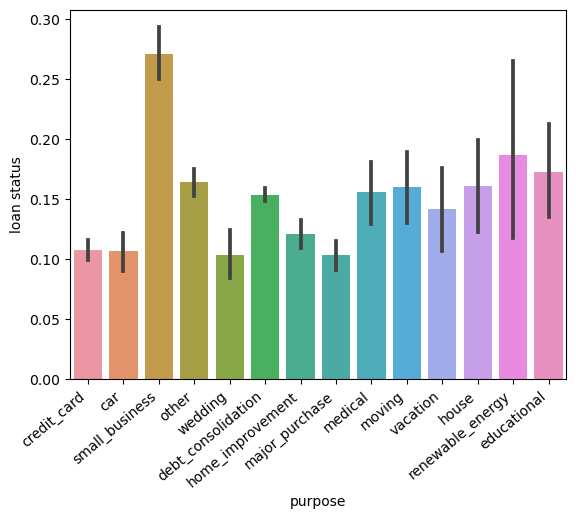

In [51]:
#analysing impact of purpose of loan on loan status
ax1=sns.barplot(x=df['purpose'],y=df['loan status'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

It can be seen that most of the defaults happen by small businesses, followed by renewable energy. The least number of defaults happen due to credit card, car , wedding and major purchase.

### Correlation Matrix for analysing numerical variables

<Axes: >

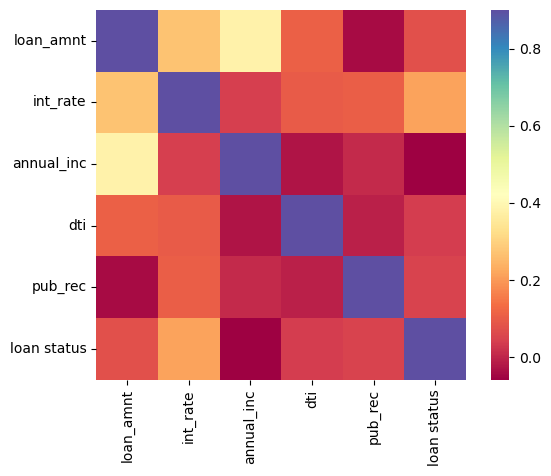

In [53]:
matrix=df1.corr()
sns.heatmap(matrix, vmax=.9, square=True, cmap="Spectral")

In [54]:
matrix['loan status']

loan_amnt      0.073469
int_rate       0.214821
annual_inc    -0.057586
dti            0.035947
pub_rec        0.047522
loan status    1.000000
Name: loan status, dtype: float64

It can be seen that loan status is correlated with interest rate of the loan, loan amount, annual income, public record and DTI in descending order of correlation.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

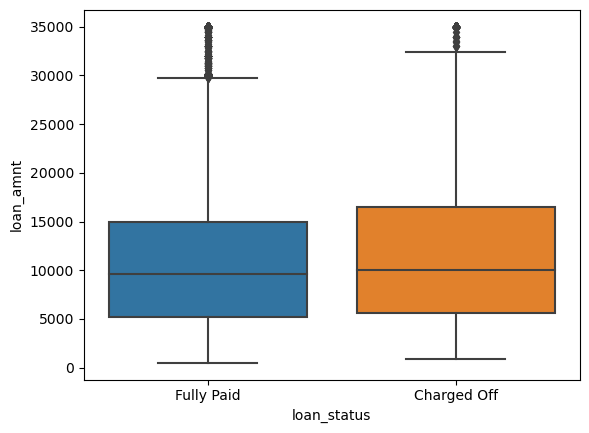

In [58]:
#analysing loan amount with loan status
sns.boxplot(x=df['loan_status'],y=df['loan_amnt'])

It can be seen that default increases with increasing average loan amount.

<Axes: xlabel='loan_status', ylabel='int_rate'>

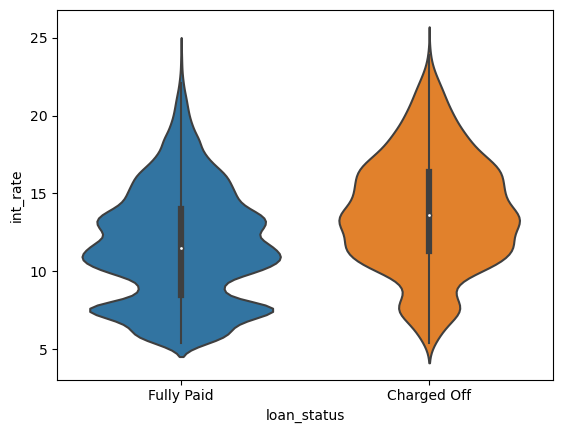

In [60]:
#analysing interest rate of the loan with loan status
sns.violinplot(x=df['loan_status'],y=df['int_rate'])

It can be seen that default increases with increasing interest rate.

<Axes: xlabel='loan_status', ylabel='annual_inc'>

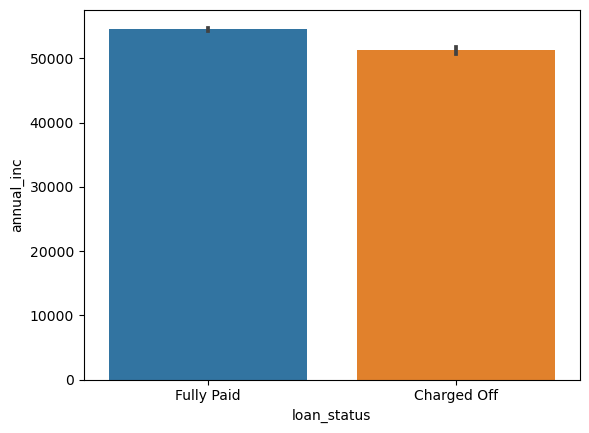

In [63]:
#analysing annual income of the loan applicant with loan status
sns.barplot(x=df1['loan_status'],y=df1['annual_inc'])

It can be seen that default decreases with increasing annual income.But the change is very less.

<Axes: xlabel='loan_status', ylabel='pub_rec'>

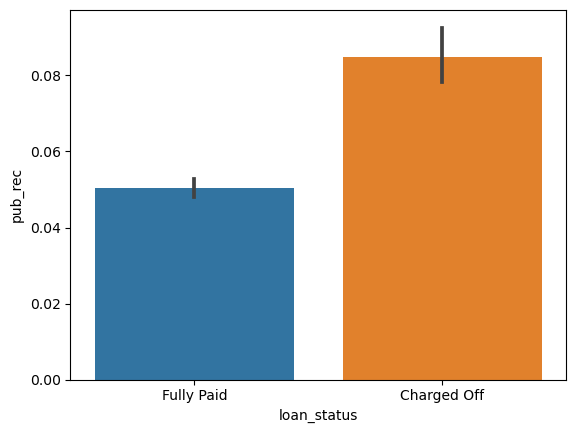

In [67]:
#analysing derogatory public record with loan status
sns.barplot(x=df['loan_status'],y=df['pub_rec'])

<Axes: xlabel='loan_status', ylabel='dti'>

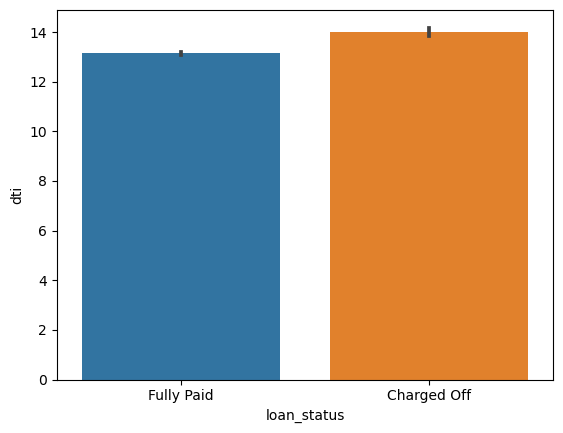

In [68]:
#analysing debt to income ratio with loan status
sns.barplot(x=df['loan_status'],y=df['dti'])

It can be seen that default increases significantly when derogatory public records are present.